Maximal Margin classifier: 

- Hyperplane: affine subspace of p-1. 
(2 dims: line,  3 dims: a plane) 

In 2 dims:    

$$  \beta_0 + \beta_1x1 + \beta_2x2 =0 $$   

(We see that the above is just an equation for a line!)

<img src='img/dec_bound.png'/>  

If X ~ (X1,X2) satifies eqn 1, then X lies on the hyperplane



If: 
$$  \beta_0 + \beta_1x1 + \beta_2x2 < 0 $$ 

Then X lies on the left side of the hyperplane.

**Think of the hyperplane as dividing our p-dimensional space into 
2 halves**  











Of course we can extend this idea to many more dimensions:
    $$  \beta_0 + \beta_1x1 + \beta_2x2  ...  + \beta_pxp  = ? $$ 

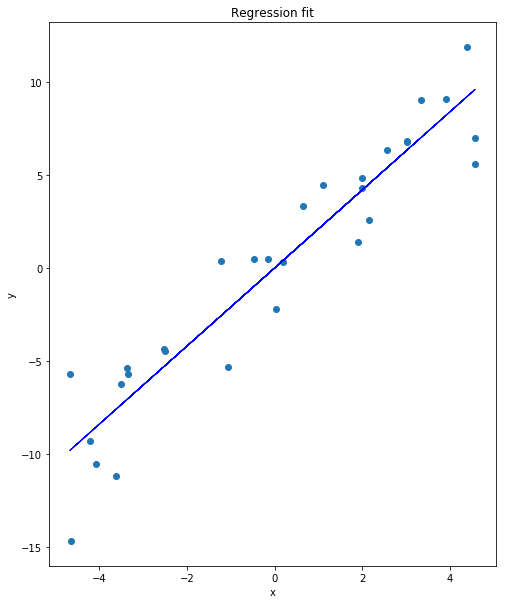

In [3]:
%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# determine a line

def diagnostic_plot(x, y):
    plt.figure(figsize=(8,10))
    
    rgr = LinearRegression()
    rgr.fit(x.reshape(s,1),y)
    pred = rgr.predict(x.reshape(s,1))

    plt.subplot(1, 1, 1)
    plt.scatter(x,y)
    plt.plot(x, pred, color='blue',linewidth=1)
    plt.title("Regression fit")
    plt.xlabel("x")
    plt.ylabel("y")
    
# Generate some data
s = 30
x = np.random.uniform(low=-5, high=5, size=s)

ep = 2*np.random.randn(s)
beta = 2
y = beta*x + ep

diagnostic_plot(x, y)

Our goal: develop a classifier baed on the training data 
    that will correctly classify the test observation using their 
    features
    
Suppose it is possible to construct a hyperplane that seperates 
training observations perfectly according to class labels. 
    
<img src='img/lin_sep.png'/>  


if y =1 :
$$  \beta_0 + \beta_1x1 + \beta_2x2  ...  + \beta_pxp > 0  $$

if y = -1 :
$$  \beta_0 + \beta_1x1 + \beta_2x2  ...  + \beta_pxp < 0  $$

If our data is linear separable --> there are still an infinite # of such hyperplanes.

**Maximal Margin Hyperplane**
The Hyperplane that maximizes the distance between training examples (of opposite classes) 

-> Compute the perpendicular distance from each training obs to a given 
separating hyperplane

* Our hope: Large margin on training  ~ large margin on the test data

* Beta_0, Beta_1 .. are the coeff. of the this max margin hyperplane, 
We want to find the weight vector (w), and the beta that corresponds to 
this hyperplane (given some test data).  We can simply classify the
test sample by what side of the hyperplane it lands on!



<img src='img/supports.png'/> 

Here we have 3 support vectors (why these 3?)

Note: the hyperplane is dependent on these vectors (and not the other data) .. lets come back to this thought. 

Lets solve for the hyperplane given our n training examples: 

$$  y_i(\beta_0 + \beta_1x_{i1} + \beta_2x{i2}  ...  + \beta_px{ip}) >= M  $$ 

for all i  = 1,2.. n

where:


(ensuring that we maintain some distance M from the hyperplane)    

with:
$$ w = {\beta_1, \beta_2,  ...  , \beta_p}$$
$$ x = {x1, x2  ... xp}$$
$$b = \beta_0$$

For now let M = 1
 
##### For our support vectors: 

$$ w\cdot{{x_+}} + b = +1 $$
$$ w\cdot{{x_-}} + b = -1 $$


$$ (w\cdot{{x_+}}) -(w\cdot{{x_-}})= 2 $$

$$width =({x}_{+}-{x}_{-})\cdot{{\vec{w}\above 1pt\|w\|}}={{2\above 1pt\|w\|}}$$

Find the maximum of: 
$$2\above 1pt\|w\|$$

**i.e. find the min. of: **

$$ {{1/2*\|w\|^2}}$$

 s.t. 
$$y_i(w.x_i+b) = 1 $$ 



##### Lagrange Multipliers:
This is constrained optimization problem, then we'll use a technique called: Lagrange Multipliers. 
Regarranging the above  inserting our Lagrange Mulipliers (alpha) we have:

######  Our cost function :

  $$ L=  1/2{{\|w\|}^2} - \sum \alpha_i[(y_i(\vec{w}\cdot{x_i} +b)-1] $$
  
  
We can solve for w,b & alphas to obtain a unique maximal margin solution:

$$\vec{w} = \sum \alpha_i(y_i{x_i})$$

dL/db:
$$  \sum \alpha_i(y_i)=0$$

**Note:**
The points that lie on the edges of the margin are the support vectors.

#### The Non-seperable Case :  'Soft' Margin

<img src='img/soft.png'/> 


**Idea**: 
- It could be beneficial to misclassify some observations on our training set, in order to perform better on test data

- Allow: some observations to be on the incorrect side of the margin
and even on the incorrect side of the hyperplane 

<img src='img/slack.png'/> 

** Soft Margin Loss Function **

$$ L=  (1/2{{\|w\|}^2} + C\sum\zeta) - \sum \alpha_i[(y_i(\vec{w}\cdot{x_i} +b)-1 +\zeta] - \sum \beta\zeta $$ 

**Lastly: **

[Scaling](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
